# Bucket Sort - Experimentation

In [136]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
# Load data from csv file
serial_data = pd.read_csv("serial_data_v1.csv", sep='\t')

In [163]:
# Filter data to separate dataframes for analysis

uniform_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "uniform") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
normal_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "normal") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
exponential_serial_data = serial_data[(serial_data.implementation == "serial") & (serial_data.distribution == "exponential") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
uniform_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "uniform") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
normal_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "normal") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])
exponential_parallel_data = serial_data[(serial_data.implementation == "parallel") & (serial_data.distribution == "exponential") & (serial_data.array_size == 50000000)].sort_values(by=['bucket_count'])

## 1. Experiments using serial code

### 1.1. Serial code performance analysis for 50 million numbers with varying bucket counts

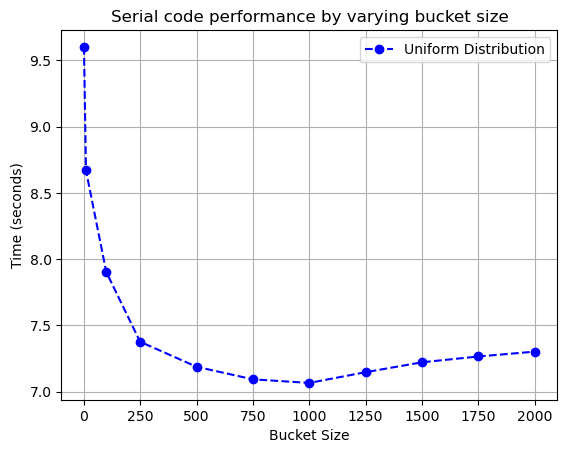

In [164]:
plt.plot(uniform_serial_data.bucket_count, uniform_serial_data.time, label='Uniform Distribution', marker='o', color='blue', linestyle='--')

plt.title('Serial code performance by varying bucket size')
plt.xlabel('Bucket Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

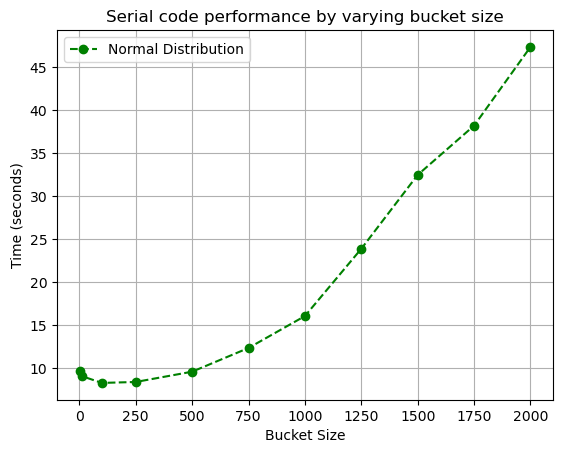

In [165]:
plt.plot(normal_serial_data.bucket_count, normal_serial_data.time, label='Normal Distribution', marker='o', color='green', linestyle='--')

plt.title('Serial code performance by varying bucket size')
plt.xlabel('Bucket Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

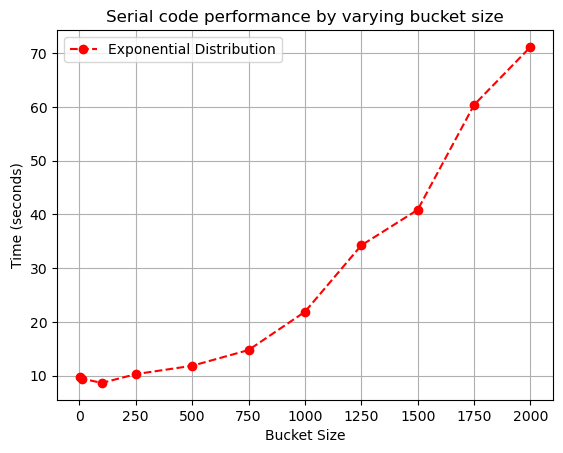

In [166]:
plt.plot(exponential_serial_data.bucket_count, exponential_serial_data.time, label='Exponential Distribution', marker='o', color='red', linestyle='--')

plt.title('Serial code performance by varying bucket size')
plt.xlabel('Bucket Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

### 1.2. Performance of serial program for different array sizes - keeping bucket size as constant = 100

In [167]:
serial_data_B100 = serial_data[(serial_data.implementation == "serial") & (serial_data.bucket_count == 100)]
serial_data_B100["ms_time"] = serial_data_B100["time"] * 1000
serial_data_B100["numbers_per_ms"] = serial_data_B100.array_size / serial_data_B100.ms_time

uniform_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "uniform"].sort_values(by=['array_size'])
normal_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "normal"].sort_values(by=['array_size'])
exponential_serial_data_B100 = serial_data_B100[serial_data_B100.distribution == "exponential"].sort_values(by=['array_size'])

/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_59911/3880396027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serial_data_B100["ms_time"] = serial_data_B100["time"] * 1000
/var/folders/tt/_tq7thkd6hx_grhd7r9xdfr40000gn/T/ipykernel_59911/3880396027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serial_data_B100["numbers_per_ms"] = serial_data_B100.array_size / serial_data_B100.ms_time


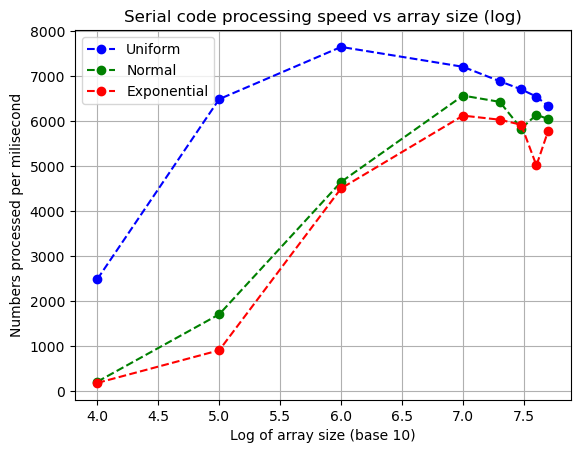

In [168]:
plt.plot(np.log10(uniform_serial_data_B100.array_size), uniform_serial_data_B100.numbers_per_ms, label='Uniform', marker='o', color='blue', linestyle='--')
plt.plot(np.log10(normal_serial_data_B100.array_size), normal_serial_data_B100.numbers_per_ms, label='Normal', marker='o', color='green', linestyle='--')
plt.plot(np.log10(exponential_serial_data_B100.array_size), exponential_serial_data_B100.numbers_per_ms, label='Exponential', marker='o', color='red', linestyle='--')

plt.title('Serial code processing speed vs array size (log)')
plt.xlabel('Log of array size (base 10)')
plt.ylabel('Numbers processed per milisecond')
plt.legend()
plt.grid(True)

plt.show()

## 2. Experiments using parallelized code

### 2.1. Parellel code performance analysis for 50 million numbers with varying bucket / thread counts

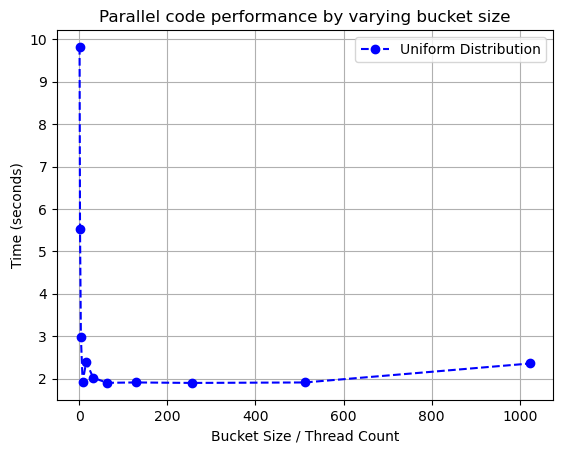

In [169]:
plt.plot(uniform_parallel_data.bucket_count, uniform_parallel_data.time, label='Uniform Distribution', marker='o', color='blue', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Bucket Size / Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

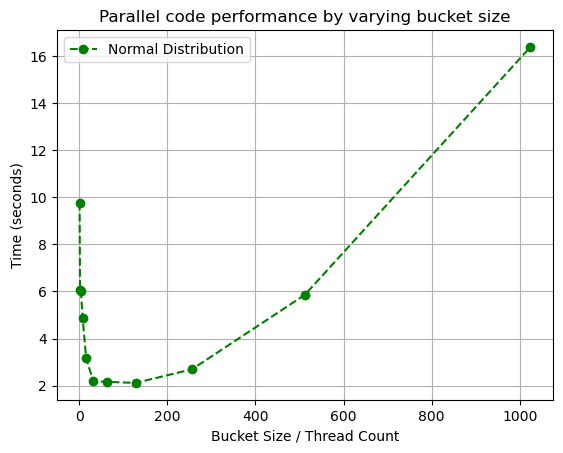

In [170]:
plt.plot(normal_parallel_data.bucket_count, normal_parallel_data.time, label='Normal Distribution', marker='o', color='green', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Bucket Size / Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()

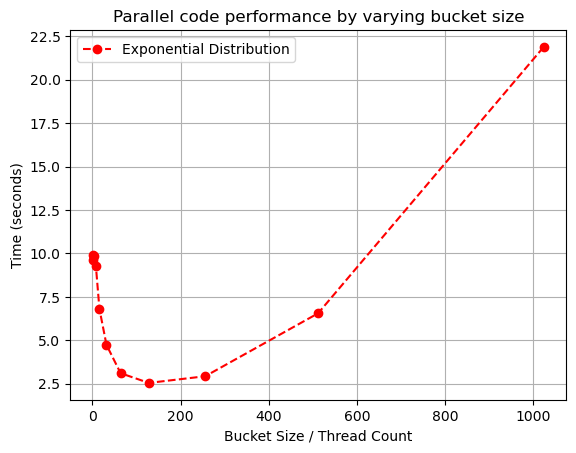

In [171]:
plt.plot(exponential_parallel_data.bucket_count, exponential_parallel_data.time, label='Exponential Distribution', marker='o', color='red', linestyle='--')

plt.title('Parallel code performance by varying bucket size')
plt.xlabel('Bucket Size / Thread Count')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.show()